In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [7]:
# Load Train dataset
train = pd.read_csv("data/callers.csv")
train.head(5).append(train.tail(5))

,calls,days_active,isgroup2,age
0,2,32,0,27
1,4,81,0,32
2,0,41,0,22
3,1,36,0,28
4,0,55,0,31
219,1,42,1,39
220,0,38,1,28
221,2,53,1,26
222,6,69,1,21
223,2,28,1,34


In [4]:
train.calls.unique()

array([2, 4, 0, 1, 3, 5, 8, 7, 6])

In [5]:
train.calls.max(), train.calls.min()

(8, 0)

In [6]:
train.isgroup2.unique()

array([0, 1])

In [7]:
train.age.min(), train.age.mean(), train.age.max()

(19, 30.111607142857142, 43)

In [8]:
train.days_active.min(), train.days_active.mean(), train.days_active.max()

(21, 53.611607142857146, 90)

In [9]:
len(train[train.isgroup2==1])

24

In [10]:
#Calculate correlations
corr = train.corr()
corr

,calls,days_active,isgroup2,age
calls,1.000000,0.349766,0.492399,-0.192066
days_active,0.349766,1.000000,-0.041676,-0.035186
isgroup2,0.492399,-0.041676,1.000000,0.064104
age,-0.192066,-0.035186,0.064104,1.000000


In [11]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.5
top_corr_columns = cr.loc[:, 'isgroup2'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.041].sort_values(ascending=False)
len(best_accurate_columns)


3

In [12]:
best_accurate_columns

isgroup2       1.000000
calls          0.492399
days_active   -0.041676
Name: isgroup2, dtype: float64

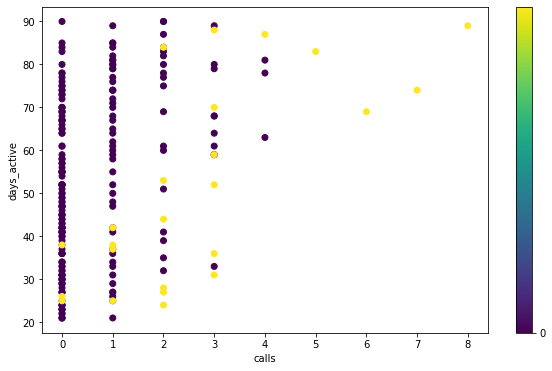

In [13]:
le = preprocessing.LabelEncoder()
le.fit(train.isgroup2.drop_duplicates())
train.isgroup2 = le.transform(train.isgroup2)


x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(10, 6))
plt.scatter(train.iloc[:, x], train.iloc[:, y],c=train.isgroup2)
plt.colorbar(ticks=[0, 10])
plt.xlabel(train.columns[x]);
plt.ylabel(train.columns[y]);

In [14]:
!pip install sns

  Created wheel for sns: filename=sns-0.1-cp36-none-any.whl size=2665 sha256=58c50229a7e0c5a659ca37400512fe1a0ae67eb7ccbd4bfb112a26380ea7eb4c
  Stored in directory: /root/.cache/pip/wheels/be/a5/d8/4390400ed430c8186a6af96dbb1cc7d0a00a5dee15d268b627
Successfully built sns


In [15]:
import seaborn as sns

count    224.000000
mean       0.107143
std        0.309987
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: isgroup2, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


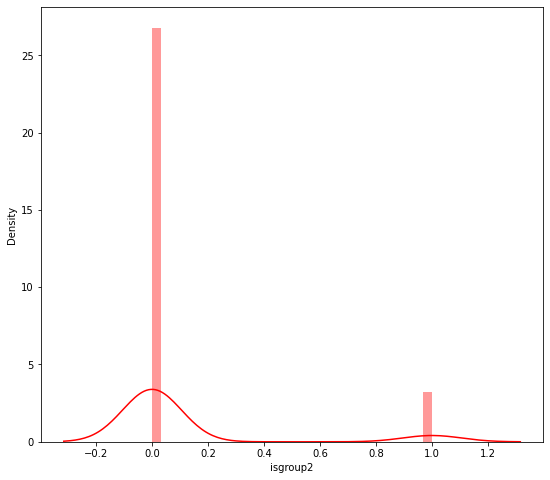

In [16]:
print(train['isgroup2'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['isgroup2'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [17]:
train_df = train.copy()

In [18]:
#make an array of min_samples_leaf to choose from 1 to 20
#num_leafs = [1, 2, 3, 4, 5, 7, 10, 15, 20]
num_leafs = [1, 2, 3, 4, 5, 6, 7, 10, 12, 14, 15,17, 20, 25]

In [19]:
y = train.isgroup2

In [20]:
train.head()

,calls,days_active,isgroup2,age
0,2,32,0,27
1,4,81,0,32
2,0,41,0,22
3,1,36,0,28
4,0,55,0,31


In [21]:
X = train_df.copy()

In [23]:
X = X.drop(columns='isgroup2')
X.head()

,calls,days_active,age
0,2,32,27
1,4,81,32
2,0,41,22
3,1,36,28
4,0,55,31


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [93]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

In [106]:
gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=3,
                                 n_jobs = -1,
                                 refit=True)

In [107]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-10-31 14:23:08.204841
Fitting 3 folds for each of 448 candidates, totalling 1344 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.4s


2020-10-31 14:23:12.799238
0:00:04.594397


[Parallel(n_jobs=-1)]: Done 1344 out of 1344 | elapsed:    4.6s finished


In [108]:
print(gsm.best_score_)

0.9180134680134681


In [110]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'euclidean',
 'weights': 'uniform'}

In [111]:
print(gsm.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [113]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


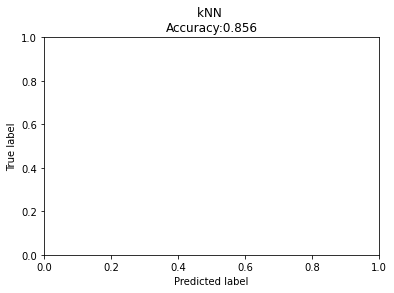

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        77
           1       0.00      0.00      0.00        13

    accuracy                           0.86        90
   macro avg       0.43      0.50      0.46        90
weighted avg       0.73      0.86      0.79        90

KNN for k =  3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


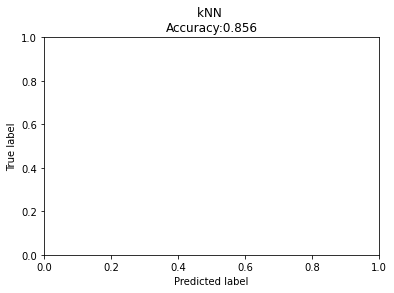

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92        77
           1       0.00      0.00      0.00        13

    accuracy                           0.86        90
   macro avg       0.43      0.50      0.46        90
weighted avg       0.73      0.86      0.79        90

KNN for k =  5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


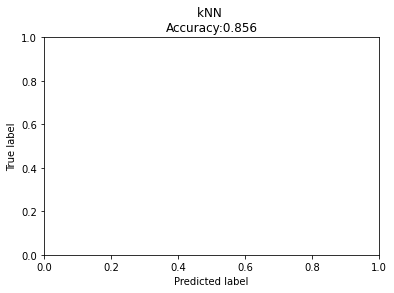

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92        77
           1       0.00      0.00      0.00        13

    accuracy                           0.86        90
   macro avg       0.43      0.50      0.46        90
weighted avg       0.73      0.86      0.79        90

KNN for k =  7
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


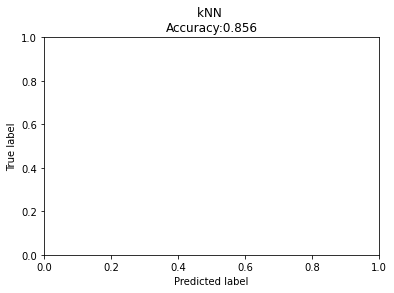

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92        77
           1       0.00      0.00      0.00        13

    accuracy                           0.86        90
   macro avg       0.43      0.50      0.46        90
weighted avg       0.73      0.86      0.79        90

KNN for k =  9
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


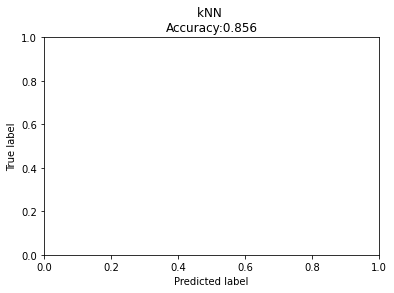

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        77
           1       0.00      0.00      0.00        13

    accuracy                           0.86        90
   macro avg       0.43      0.50      0.46        90
weighted avg       0.73      0.86      0.79        90



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    risk_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(risk_predictor)
    cm = confusion_matrix(y_test, risk_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, risk_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(classification_report(y_test, risk_predictor))